<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
product_df=pd.read_csv("/content/drive/MyDrive/Statistical NLP/product_data (1).csv")
review=pd.read_csv("/content/drive/MyDrive/Statistical NLP/reviews (1).csv")

In [5]:
product_df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [6]:
review.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


In [7]:
product_df.shape

(720, 10)

In [8]:
review.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [9]:
product_data=product_df.drop(columns=["url","image","reviewUrl"])

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [10]:
product_data.describe(include="all")

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B07643YNY8,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [11]:
review.describe(include="all")

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

# Summary of Product data

In [12]:
# We have 720 unique products, with Samsung as top brand and the top title is Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ..

In [13]:
#Range of ratings is between 1 to 5

In [14]:
#Range of price is between 0 to 999.99

# Summary of Reviews Data

In [15]:
#We have 47323	unique names with top name as Amazon Customer

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

In [16]:
product_data["brand"].value_counts()

Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: brand, dtype: int64

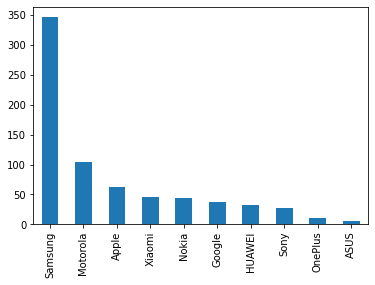

In [17]:
product_data["brand"].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

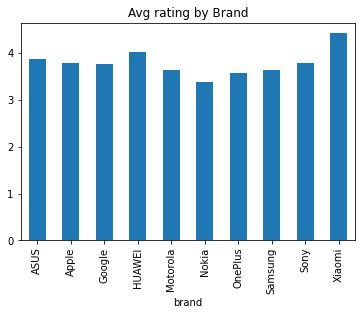

In [18]:
product_data.groupby('brand')['rating'].mean().plot(kind="bar",title="Avg rating by Brand")

### 4.6 Display average price per brand

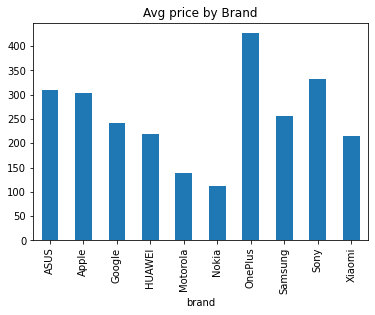

In [19]:
product_data.groupby('brand')['price'].mean().plot(kind="bar",title="Avg price by Brand")

### 4.7 Display average 'totalReviews' per brand

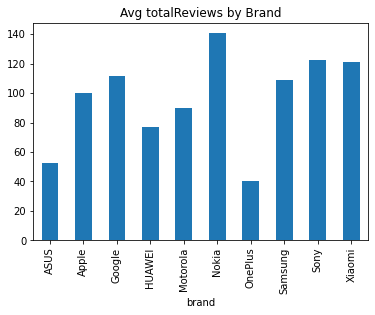

In [20]:
product_data.groupby('brand')['totalReviews'].mean().plot(kind="bar",title="Avg totalReviews by Brand")

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [21]:
merged_df=product_data.merge(review,on="asin")

In [22]:
merged_df.head(2)

,asin,brand,title_x,rating_x,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000


In [23]:
merged_df.shape

(67986, 14)

In [24]:
merged_df.head()

,asin,brand,title_x,rating_x,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000
2,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000
3,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000
4,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [25]:
merged_df.rename(columns={"rating_x": "overall_rating", "rating_y": "user_rating","title_y":"review_title","title_x":"item_title"},inplace=True)

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67986 entries, 0 to 67985
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            67986 non-null  object 
 1   brand           67786 non-null  object 
 2   item_title      67986 non-null  object 
 3   overall_rating  67986 non-null  float64
 4   totalReviews    67986 non-null  int64  
 5   price           67986 non-null  float64
 6   originalPrice   67986 non-null  float64
 7   name            67984 non-null  object 
 8   user_rating     67986 non-null  int64  
 9   date            67986 non-null  object 
 10  verified        67986 non-null  bool   
 11  review_title    67972 non-null  object 
 12  body            67965 non-null  object 
 13  helpfulVotes    27215 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 7.3+ MB


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [27]:
verified_df=merged_df[merged_df["verified"]==True]

In [28]:
verified_df.shape

(61225, 14)

In [29]:
verified_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            61225 non-null  object 
 1   brand           61078 non-null  object 
 2   item_title      61225 non-null  object 
 3   overall_rating  61225 non-null  float64
 4   totalReviews    61225 non-null  int64  
 5   price           61225 non-null  float64
 6   originalPrice   61225 non-null  float64
 7   name            61223 non-null  object 
 8   user_rating     61225 non-null  int64  
 9   date            61225 non-null  object 
 10  verified        61225 non-null  bool   
 11  review_title    61211 non-null  object 
 12  body            61207 non-null  object 
 13  helpfulVotes    23162 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 6.6+ MB


### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

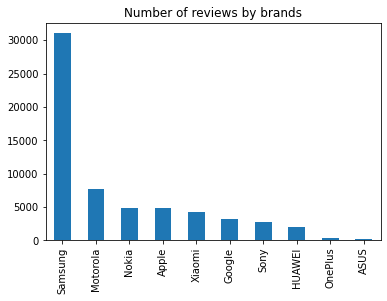

In [30]:
verified_df["brand"].value_counts().plot(kind="bar",title="Number of reviews by brands")

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [31]:
verified_df.columns

Index(['asin', 'brand', 'item_title', 'overall_rating', 'totalReviews',
       'price', 'originalPrice', 'name', 'user_rating', 'date', 'verified',
       'review_title', 'body', 'helpfulVotes'],
      dtype='object')

In [32]:
df_reviews=verified_df[["brand","body","price","user_rating","review_title"]]
df_reviews.head(2)

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

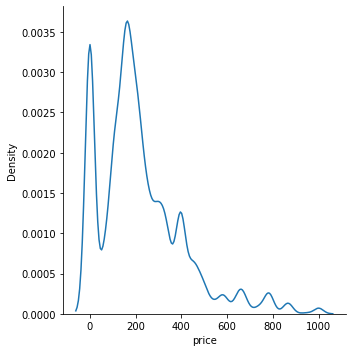

In [33]:
sns.displot(df_reviews["price"],kind="kde")

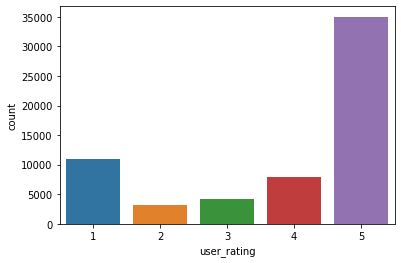

In [34]:
sns.countplot(df_reviews["user_rating"])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [35]:
def sentiment(x):
  if(x>3):
    return 1
  elif (x==3):
    return 0
  else:
    return -1

In [36]:
df_reviews["sentiment"]=df_reviews["user_rating"].map(sentiment)

### 4.15 Check frequency distribution of the 'sentiment'

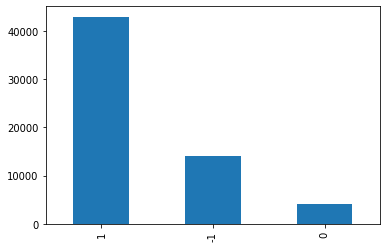

In [37]:
df_reviews["sentiment"].value_counts().plot(kind="bar")

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [38]:
pd.crosstab(df_reviews.brand, df_reviews.sentiment)


sentiment,-1,0,1
brand,,,
ASUS,49,20,137
Apple,1320,307,3249
Google,804,207,2152
HUAWEI,261,105,1653
Motorola,1667,553,5494
Nokia,1437,467,2974
OnePlus,34,11,259
Samsung,7469,2030,21521
Sony,663,216,1812


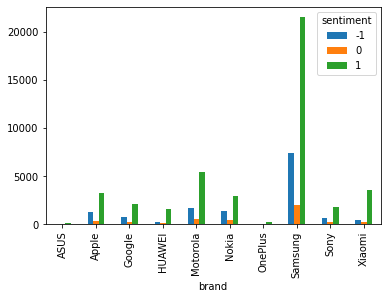

In [39]:
pd.crosstab(df_reviews.brand, df_reviews.sentiment).plot(kind="bar")

In [40]:
corr=df_reviews.corr()
corr

,price,user_rating,sentiment
price,1.0000000,0.0549462,0.0466878
user_rating,0.0549462,1.0000000,0.9694496
sentiment,0.0466878,0.9694496,1.0000000


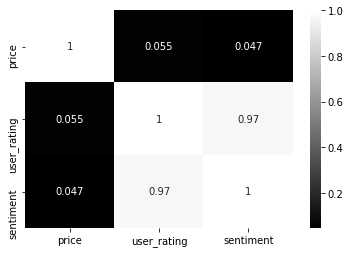

In [41]:
sns.heatmap(corr,annot=True,cmap="gray")

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [42]:
df_reviews['body'] = df_reviews['body'].astype('str')
df_reviews['keywords'] = df_reviews['body'].apply(lambda x: x.lower())

In [43]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61225 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
 6   keywords      61225 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


In [44]:
df_reviews.head(2)

,brand,body,price,user_rating,review_title,sentiment,keywords
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1,don't buy out of service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1,1 star because the phones locked so i have to ...


In [45]:
df_reviews.dtypes

brand            object
body             object
price           float64
user_rating       int64
review_title     object
sentiment         int64
keywords         object
dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [46]:
df_reviews["keywords"]=df_reviews["keywords"].str.replace('[^\w\s]','')
df_reviews.head(2)

,brand,body,price,user_rating,review_title,sentiment,keywords
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1,dont buy out of service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1,1 star because the phones locked so i have to ...


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [48]:
type(stop)

set

In [49]:
df_reviews.dtypes

brand            object
body             object
price           float64
user_rating       int64
review_title     object
sentiment         int64
keywords         object
dtype: object

In [50]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61225 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
 6   keywords      61225 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


In [51]:
df_reviews.head(2)

,brand,body,price,user_rating,review_title,sentiment,keywords
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1,dont buy out of service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1,1 star because the phones locked so i have to ...


In [52]:
df_reviews['keywords'] = df_reviews['keywords'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop))


In [53]:
df_reviews.head(2)

,brand,body,price,user_rating,review_title,sentiment,keywords
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1,dont buy service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [54]:
import nltk
nltk.download('wordnet')
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [55]:
def lemmatize_text(text):
  return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [56]:
df_reviews['lemm'] = df_reviews['keywords'].apply(lemmatize_text)
df_reviews.head(2)

,brand,body,price,user_rating,review_title,sentiment,keywords,lemm
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,-1,dont buy service,dont buy service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock,1 star phone locked pay additional fee unlock


### 5.5 Write a function to check word frequency of the text

In [57]:
def word_count(text):
  words = text.split()
  freq_dict = {word:words.count(word) for word in words}
  return freq_dict

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [58]:
high_freq=df_reviews[df_reviews['sentiment']==1]
high_freq.head()

,brand,body,price,user_rating,review_title,sentiment,keywords,lemm
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...,product good used cell phone one project worke...
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...,bought phone replace lg phone didnt like expec...
24,Motorola,SERVED ME WELL AS A BACK UP PHONE.,99.9900000,5,Five Stars,1,served well back phone,served well back phone
26,Motorola,Sturdy - clarity is great - easy to use Only p...,99.9900000,4,Awesome with a But!!,1,sturdy clarity great easy use problem speaker ...,sturdy clarity great easy use problem speaker ...
28,Motorola,It does a beautiful job. I have used this item...,99.9900000,5,Is cheap but ok quality,1,beautiful job used item att account good see b...,beautiful job used item att account good see b...


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [62]:
transformed_text = tfidf_vectorizer.fit_transform(df_reviews['lemm'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [63]:
y1 = df_reviews['sentiment']
y2 = df_reviews['user_rating']

### 5.9 Split the data into Train & Test Sets

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test = train_test_split(transformed_text,y1,random_state=42,stratify=y1,test_size=0.30)
x_train,x_test,y2_train,y2_test = train_test_split(transformed_text,y2,random_state=42,stratify=y1,test_size=0.30)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'


In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1=RandomForestClassifier()
rf_clf1.fit(x_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 6.2 Predict on test set

In [66]:
rf_clf1.predict(x_test)

array([ 1,  1,  1, ..., -1,  1, -1])

### 6.3 Check accuracy and confusion matrix

In [67]:
print(rf_clf1.score(x_train,y1_train))
print(rf_clf1.score(x_test,y1_test))

0.9951233170777236
0.8522974738675958


In [68]:
from sklearn.metrics import confusion_matrix,classification_report
y1_pred=rf_clf1.predict(x_test)
confusion_matrix(y1_test,y1_pred)

array([[ 3077,    12,  1159],
       [  378,    85,   775],
       [  384,     5, 12493]])

In [69]:
import xgboost as xgb
xgb_clf2 = xgb.XGBClassifier(n_estimators=350)
xgb_clf2.fit(x_train,y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=350, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
xgb_clf2.predict(x_test)

array([5, 5, 5, ..., 1, 5, 1])

In [71]:
print(xgb_clf2.score(x_train,y2_train))
print(xgb_clf2.score(x_test,y2_test))

0.7160090533635112
0.6814024390243902


## 7. Write your conclusion

Clearly random forest classifier to predict sentiment is overfitting as it works well on training but not test data. Also the classification is heavily tilted towards positive sentiment 1. Sampling techniques may help in improving this model.